# Análisis de texto: Programas de Gobierno

In [1]:
#-*- coding: utf8 -*-
import nltk
import pandas as pd
import numpy as np
import PyPDF2
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
%matplotlib notebook
import matplotlib.pyplot as plt

#### Créditos
+ Procesamiento de texto en español https://github.com/javierlopeza
+ Stemming y Lemmatization en Español (http://www.lexiconista.com/Datasets/lemmatization-es.zip.)

### FUNCIÓN NUBE DE PALABRAS

In [19]:
def nube(programa,titulo,nombre_archivo):
    
    filename = programa 

    #open allows you to read the file
    pdfFileObj = open(filename,'rb')
    #The pdfReader variable is a readable object that will be parsed
    pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
    #discerning the number of pages will allow us to parse through all #the pages
    num_pages = pdfReader.numPages
    count = 0
    text = ""
    #The while loop will read each page
    while count < num_pages:
        pageObj = pdfReader.getPage(count)
        count +=1
        text += pageObj.extractText()

### Tokenization
    tokenizer = RegexpTokenizer("[\w']+")
    programa = tokenizer.tokenize(text)
    n_tokens=len(programa)
    tokens=[]
    for i in range(0,n_tokens):
        tokens.append(programa[i].lower())

### Stemming and Lemmatization

    lemmaDict = {}
    with open('lemmatization-es.txt', 'rb') as f:
        data = f.read().decode('utf8').replace(u'\r', u'').split(u'\n')
        data = [a.split(u'\t') for a in data]

    for a in data:
        if len(a) > 1:
            lemmaDict[a[1]] = a[0]

    def lemmatize(word):
        return lemmaDict.get(word, word + u'*')
    lemas = []
    #print("Original   ->   Lema")
    #print("--------------------")
    #for word in tokens[:10]:
    #    word_lema = lemmatize(word)
    #    print("{}   ->   {}".format(word, word_lema))
    for word in tokens:
        word_lema = lemmatize(word)
        lemas.append(word_lema)
        
## Análisis
#### Eliminar Stopwords

    from nltk.corpus import stopwords
    spanish = stopwords.words('spanish')
    spanish.extend(['si', 'programa', 'ello','sistema','cada','sino','sido','hacia','sólo','parte',
                    'caso','parir','comer','casar','mercar','asir','aguar'])

    def remove_stopwords(tokens):
        filtro = [w for w in tokens if not w in spanish]
        return filtro

    tokens_filtro = remove_stopwords(lemas)
    tokens_filtro = [w.replace("*", "") for w in tokens_filtro]
    tokens_filtro = [w.replace("programar", "programa") for w in tokens_filtro]
    tokens_filtro = [w.replace("gobernar", "gobierno") for w in tokens_filtro]
    tokens_filtro = [w.replace("desarrollar", "desarrollo") for w in tokens_filtro]
    tokens_filtro = [w.replace("personar", "personas") for w in tokens_filtro]
    tokens_filtro = [w.replace("libertar", "libertad") for w in tokens_filtro]

    tokens_filtro = [w for w in tokens_filtro if len(w)>3]
    
    from nltk import FreqDist
    dist_programa = FreqDist(tokens_filtro) 
    
### Wordcloud    
    from wordcloud import WordCloud
    font_path = r'C:\Windows\Fonts\trebuc.ttf'
    palabras_programa = ' '.join(tokens_filtro)
    programa_wordcloud = WordCloud(stopwords=spanish, width=800, height=500, font_path=font_path, max_words=len(tokens_filtro), relative_scaling=0.4,min_font_size=8, background_color='white',random_state=4).generate(palabras_programa)
    
### Exportar
    plt.figure(figsize=(12,6))
    plt.title(titulo)
    plt.imshow(programa_wordcloud.to_array(), interpolation="bilinear")
    plt.axis("off")
#    programa_wordcloud.to_file(nombre_archivo)
    plt.savefig(nombre_archivo)
    return plt.show()

<IPython.core.display.Javascript object>


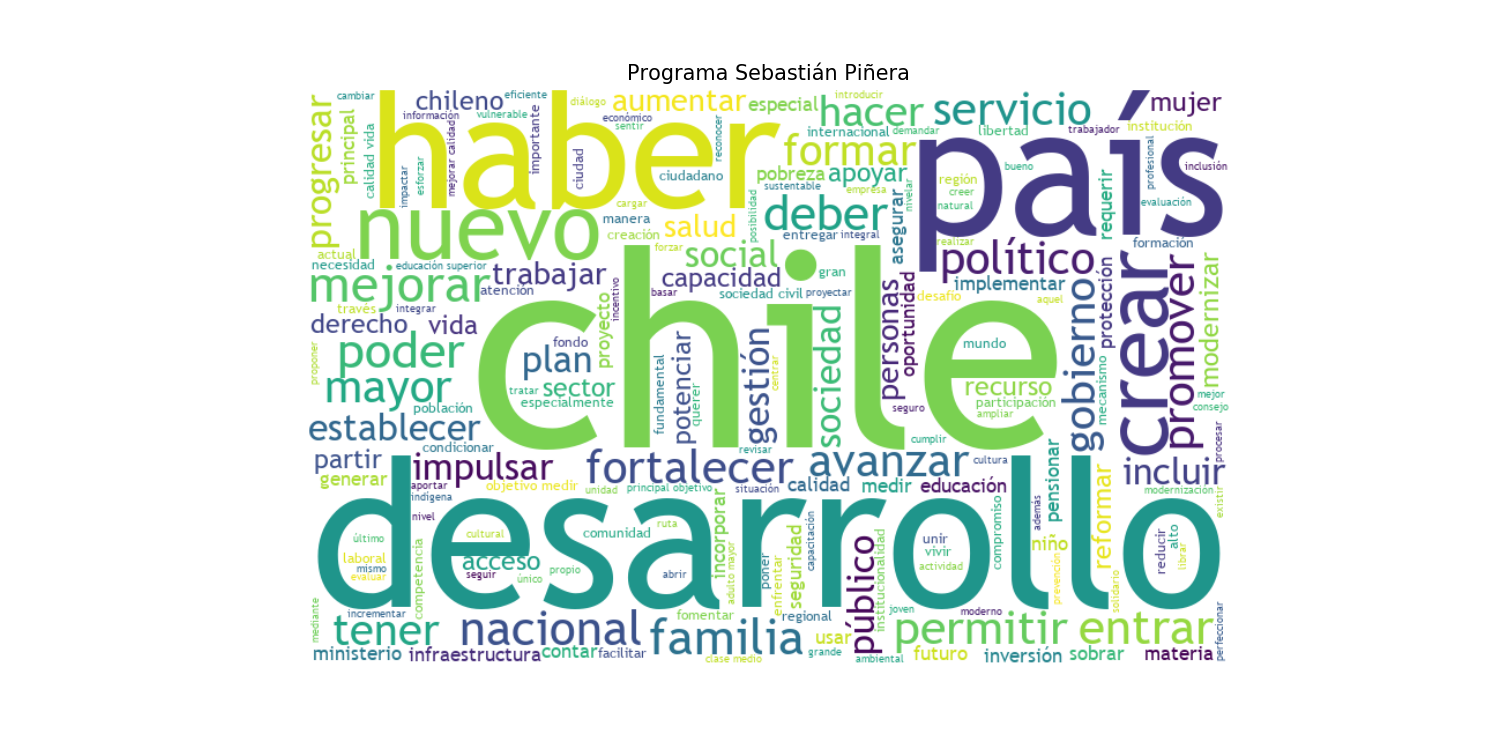

<IPython.core.display.Javascript object>


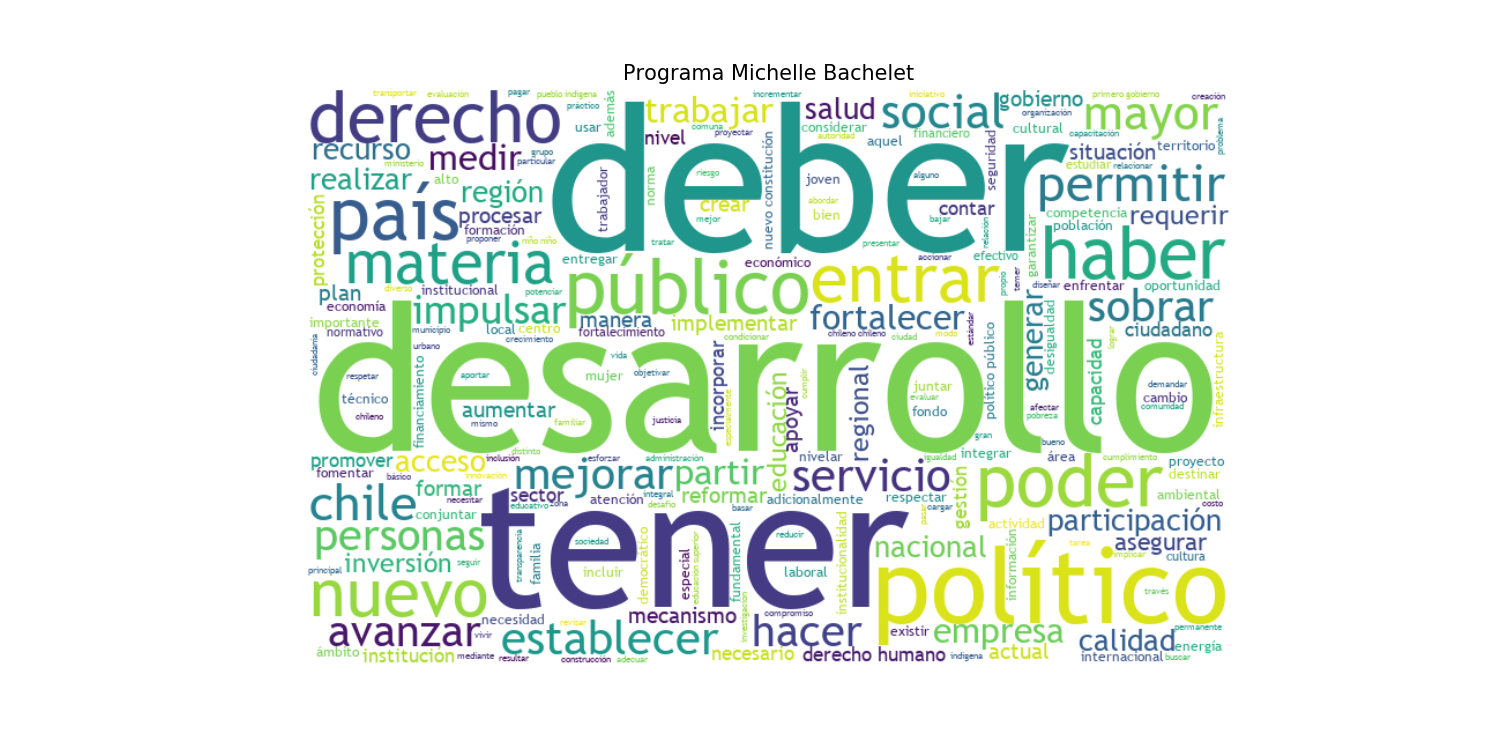

<IPython.core.display.Javascript object>


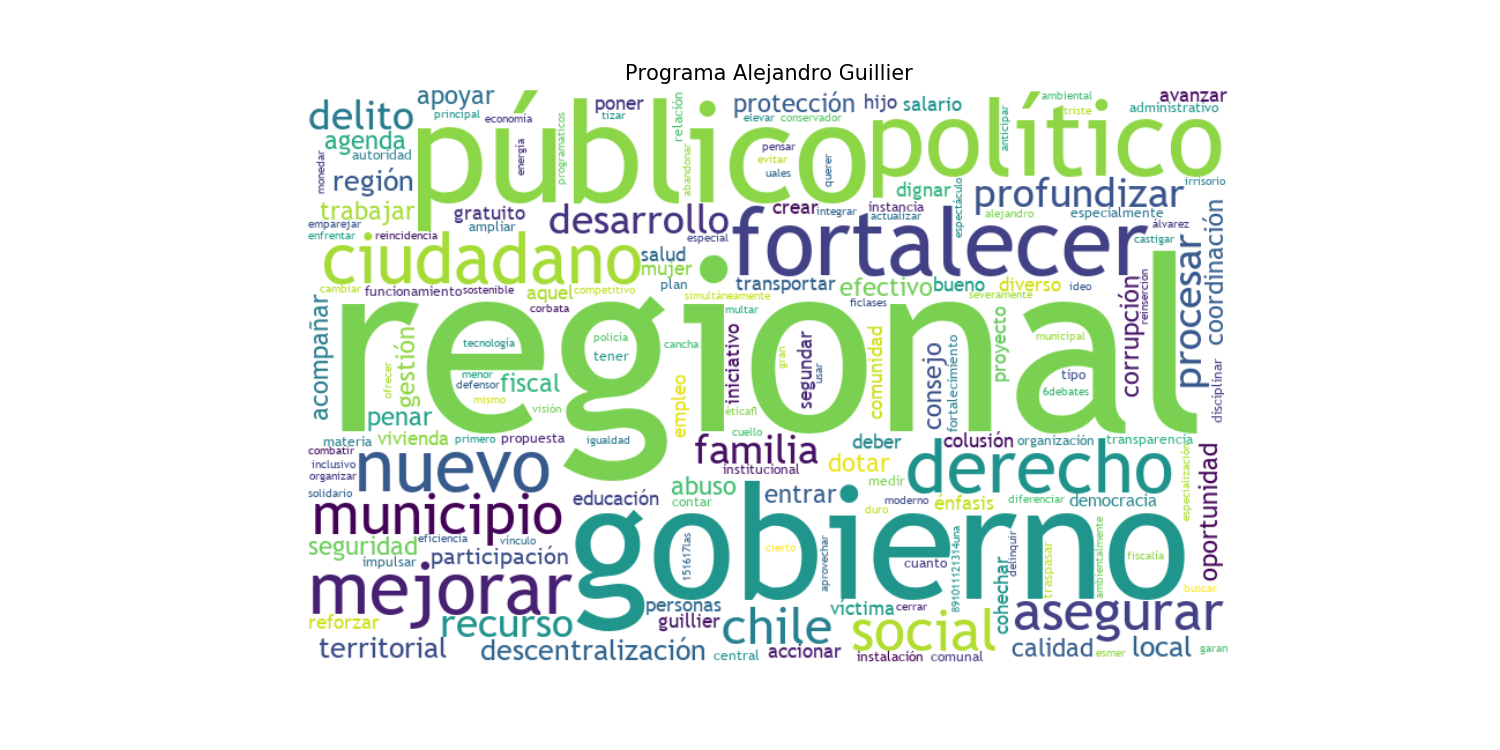

<IPython.core.display.Javascript object>


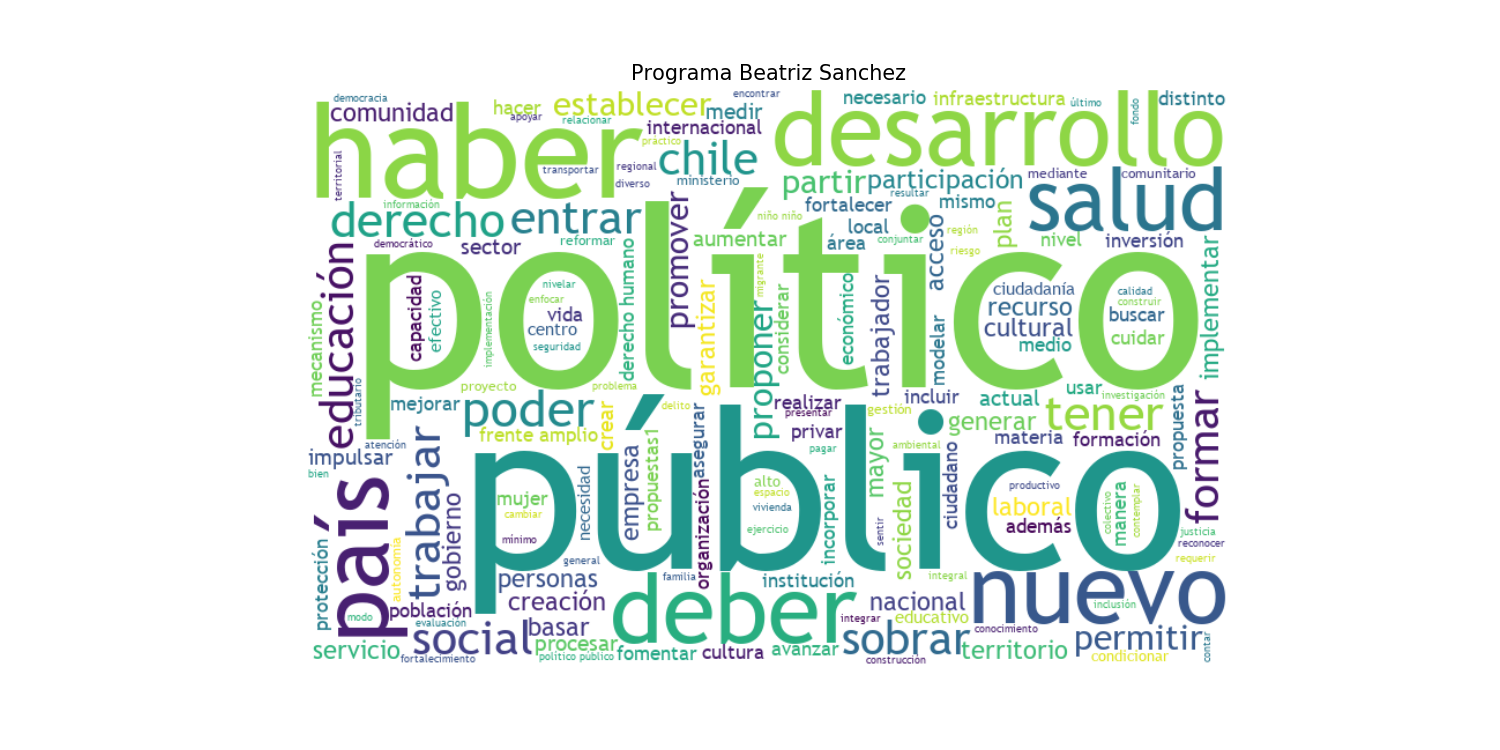

In [20]:
nube('programa-SP.pdf','Programa Sebastián Piñera','nube_sp.png')
nube('programa-MB.pdf','Programa Michelle Bachelet','nube_mb.png')
nube('programa-AG.pdf','Programa Alejandro Guillier','nube_ag.png')
nube('programa-BS.pdf','Programa Beatriz Sanchez','nube_bs.png')

#### N-Grams

In [13]:
from nltk.util import ngrams
from collections import Counter

In [14]:
bigrams = list(ngrams(tokens, 2))
trigrams = list(ngrams(tokens, 3))
#count_bigrams = Counter(bigrams)
#print(count_bigrams.most_common(50))

In [15]:
count_trigrams = Counter(trigrams)
print(count_trigrams.most_common(50))

[(('en', 'materia', 'de'), 72), (('días', 'de', 'gobierno'), 38), (('de', 'los', 'derechos'), 38), (('el', 'desarrollo', 'de'), 36), (('proyecto', 'de', 'ley'), 33), (('los', 'primeros', '100'), 32), (('primeros', '100', 'días'), 32), (('la', 'nueva', 'constitución'), 32), (('100', 'días', 'de'), 31), (('los', 'pueblos', 'indígenas'), 31), (('en', 'los', 'primeros'), 30), (('la', 'calidad', 'de'), 30), (('a', 'través', 'de'), 27), (('un', 'programa', 'de'), 27), (('de', 'las', 'personas'), 25), (('de', 'derechos', 'humanos'), 25), (('derecho', 'a', 'la'), 25), (('de', 'los', 'pueblos'), 25), (('en', 'el', 'ámbito'), 24), (('de', 'la', 'población'), 23), (('el', 'acceso', 'a'), 23), (('de', 'la', 'educación'), 23), (('el', 'derecho', 'a'), 23), (('de', 'las', 'políticas'), 22), (('los', 'derechos', 'de'), 22), (('los', 'derechos', 'humanos'), 22), (('calidad', 'de', 'vida'), 21), (('el', 'sistema', 'de'), 21), (('del', 'sistema', 'de'), 21), (('chilenos', 'y', 'chilenas'), 19), (('niños